In [1]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np

# define a test structure
#test_args = {
#    "therml": True,
#    'TeMperature' : 440,
#    "wavelength_list": [300e-9, 20300e-9, 1001],
#    "material_list": ['Air',  'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'polystyrene', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Air'], 
#    "thickness_list": [0,  2.6422605026007024e-07, 3.733648095151694e-07, 5.284521005201405e-07, 3.733648095151694e-07, 5.284521005201405e-07, 3.733648095151694e-07, 0.0001, 0.001, 3.8014616788692957e-07, 5.311796118517261e-07, 7.602923357738591e-07, 5.311796118517261e-07, 7.602923357738591e-07, 5.311796118517261e-07, 0.0001, 0]
#}

test_args = {
    "therml": True,
    'TeMperature' : 440,
    "wavelength_list": [300e-9, 6000e-9, 1001],
    "material_list": ['Air',  'SiO2', 'AlN', 'SiO2', 'polystyrene', 'SiO2', 'AlN', 'SiO2','Air'], 
    "thickness_list": [0,  600e-9, 450e-9, 600e-9, 10000e-9, 600e-9, 450e-9, 600e-9, 0]
}

We are going to compute the transmissivity of the above structure to the AM1.5 solar spectrum that falls below the bandgap wavelength (assumed to be $\lambda_{bg} = 760$ nm (see [here](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.92.045414),
and [here](https://pubs.acs.org/doi/10.1021/acs.nanolett.6b03114),
and the thermal emission in the SWIR ($\lambda_{min} = 1000$ nm  and $\lambda_{max} =  3500$ nm) 
assuming an emitter temperature of $T_E = 440 K$.

In particular, we will compute
    $$ T_{AM1.5} = \int_0^{\lambda_{bg}} I_{AM1.5}(\lambda) T(\lambda) d\lambda $$
and

$$ \epsilon_{SWIR} = \int_{\lambda_{min}}^{\lambda_{max}} B(\lambda, T_E) \epsilon(\lambda) d\lambda $$

In [2]:

import time
start = time.time()

sf = wptherml.SpectrumFactory()  
# create instance of class
ts = sf.spectrum_factory("Tmm", test_args)



 Your spectra have been computed! 😎 
 Your therml spectra have been computed! 🔥 


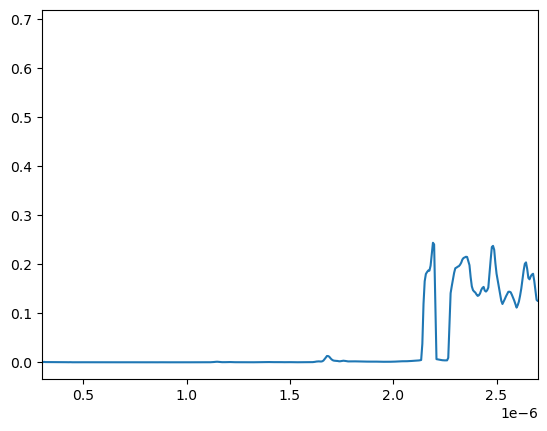

In [3]:
plt.plot(ts.wavelength_array, ts.emissivity_array)
plt.xlim(300e-9, 2700e-9)
plt.show()

In [4]:
ts.compute_pv_stpv()
print(ts.pv_stpv_p_abs)
print(ts.pv_stpv_p_split)
print(ts.thickness_array)

 A  1e-06  m air layer has been inserted into layer numbe  8
 Use the `material_X( 8 ) command to define the material of this new layer!
142.18826553154634
48.090508009155684
[0.0e+00 6.0e-07 4.5e-07 6.0e-07 1.0e-05 6.0e-07 4.5e-07 6.0e-07 0.0e+00]


In [5]:
n_layers = 6
N = 3
thicknesses = np.random.randint(1000, size=(N, n_layers))
solutions = np.zeros((N, n_layers+2))
#[0.0e+00 1.0e-06 6.0e-07 4.5e-07 6.0e-07 1.0e-05 6.0e-07 4.5e-07 6.0e-07
# 1.0e-06 0.0e+00]
solutions[:,:3] = thicknesses[:,:3]
solutions[:,3:6] = thicknesses[:,3:]
print(thicknesses)
print(solutions)
for i in range(0, N):
    ts.thickness_array[1:4] = solutions[i,:3] * 1e-9
    ts.thickness_array[5:8] = solutions[i,3:6] * 1e-9
    #print(ts.thickness_array)
    ts.compute_pv_stpv()
    solutions[i,6] = ts.pv_stpv_p_abs
    solutions[i,7] = ts.pv_stpv_p_split

[[173  91 312 869 868 189]
 [385 653 277  35 529 429]
 [389 703 988 142 838 462]]
[[173.  91. 312. 869. 868. 189.   0.   0.]
 [385. 653. 277.  35. 529. 429.   0.   0.]
 [389. 703. 988. 142. 838. 462.   0.   0.]]
 A  1e-06  m air layer has been inserted into layer numbe  8
 Use the `material_X( 8 ) command to define the material of this new layer!
 A  1e-06  m air layer has been inserted into layer numbe  8
 Use the `material_X( 8 ) command to define the material of this new layer!
 A  1e-06  m air layer has been inserted into layer numbe  8
 Use the `material_X( 8 ) command to define the material of this new layer!


In [6]:
print(solutions)

[[173.          91.         312.         869.         868.
  189.         160.38781776  39.57867272]
 [385.         653.         277.          35.         529.
  429.         143.10985757  46.31195562]
 [389.         703.         988.         142.         838.
  462.         147.17375968  53.16734672]]


In [ ]:
#"thickness_list": [0,  600e-9, 450e-9, 600e-9, 10000e-9, 600e-9, 450e-9, 600e-9, 0]
solutions[:,:n_layers] = thicknesses


for i in range(0, N):
    ts.thickness_array[2:5] = solutions[i,:3] * 1e-9
    ts.compute_stpv()
    solutions[i,3] = test.stpv_spectral_efficiency
    solutions[i,4] = test.stpv_power_density

In [ ]:
# want to create a step function so that we can only integrate
# a subinterval of the entire reflectivity function up to 760 nm
target_pv = 760e-9 * np.ones_like(ts.wavelength_array)
stop_idx = np.argmin(np.abs( target_pv - ts.wavelength_array) )

# step function to cut off at \lambda_bg of the PV
step_pv = np.zeros_like(ts.wavelength_array)
step_pv[:stop_idx] = 1.

# do the same for the to create a step function between 1000 and 3500 nm
target_min = 1000e-9 * np.ones_like(ts.wavelength_array)
target_max = 3500e-9 * np.ones_like(ts.wavelength_array)

min_idx = np.argmin(np.abs( target_min - ts.wavelength_array))
max_idx = np.argmin(np.abs( target_max - ts.wavelength_array))

step_swir = np.zeros_like(ts.wavelength_array)
step_swir[min_idx:max_idx] = 1.


### Integrate the above-gap solar flux transmitted through optic
AM_transmit_power = np.trapz(ts._solar_spectrum * step_pv *  ts.transmissivity_array, ts.wavelength_array)
### Integrate the thermal emission of the optic in the SWIR
SWIR_emit_power = np.trapz(ts.thermal_emission_array * step_swir, ts.wavelength_array)

### Integrate the total above-gap solar flux
AM_above_gap = np.trapz(ts._solar_spectrum * step_pv, ts.wavelength_array)
### Integrate the total BB emission at 440 K in the SWIR
SWIR_power = np.trapz(ts.blackbody_spectrum * step_swir, ts.wavelength_array)

end = time.time()
print("time required")
print(end-start)
print(SWIR_emit_power,  " W / s / m^2 emitted")
print(AM_transmit_power," W / s / m^2 transmitted")

print(SWIR_power,  " W / s / m^2 emitted")
print(AM_above_gap," W / s / m^2 transmitted")

In [ ]:
import random
def update_multilayer(SP, AP):
    d1 = random.uniform(1, 700)
    d3 = random.uniform(1, 700)
    d4 = random.uniform(1, 700)
    d5 = random.uniform(1, 700)
    d6 = random.uniform(1, 700)
    d7 = random.uniform(1, 700)
    d8 = random.uniform(1, 700)
    d9 = random.uniform(1, 700)
    d11 = random.uniform(1, 700)
    d13 = random.uniform(1, 700)
    d14 = random.uniform(1, 700)
    d15 = random.uniform(1, 700)
    d16 = random.uniform(1, 700)
    d17 = random.uniform(1, 700)
    d18 = random.uniform(1, 700)
    d19 = random.uniform(1, 700)
    ts.thickness_array[1] = d1 * 1e-9
    ts.thickness_array[3] = d3 * 1e-9
    ts.thickness_array[4] = d4 * 1e-9
    ts.thickness_array[5] = d5 * 1e-9
    ts.thickness_array[6] = d6 * 1e-9
    ts.thickness_array[7] = d7 * 1e-9
    ts.thickness_array[8] = d8 * 1e-9
    ts.thickness_array[9] = d9 * 1e-9
    ts.thickness_array[11] = d11 * 1e-9
    ts.thickness_array[13] = d13 * 1e-9
    ts.thickness_array[14] = d14 * 1e-9
    ts.thickness_array[15] = d15 * 1e-9
    ts.thickness_array[16] = d16 * 1e-9
    ts.thickness_array[17] = d17 * 1e-9
    ts.thickness_array[18] = d18 * 1e-9
    ts.thickness_array[19] = d19 * 1e-9
    ts.compute_spectrum()
    ts._compute_therml_spectrum(ts.wavelength_array, ts.emissivity_array)
    AM_transmit_power = np.trapz(ts._solar_spectrum * step_pv *  ts.transmissivity_array, ts.wavelength_array)
    ### Integrate the thermal emission of the optic in the SWIR
    SWIR_emit_power = np.trapz(ts.thermal_emission_array * step_swir, ts.wavelength_array)
    d = np.array([d1, d3, d4, d5, d6, d7, d8, d9, d11, d13, d14, d15, d16, d17, d18, d19])
    return d/700, AM_transmit_power/AP, SWIR_emit_power/SP

In [ ]:
print(update_multilayer(SWIR_power,AM_above_gap ))

Want to call update_multilayer() 100,000 times, print each thicnkess / 700 (so that is maxes out at 1), and print AM_transmit_power / AM_above_gap, SWIR_emit_power / SWIR_power to a file.

In [ ]:
dim = 50000

f = open('stpv_pv_50k.csv', 'w')
for i in range(0, dim):
    d, T_AM, E_SWIR = update_multilayer(SWIR_power, AM_above_gap)
    #print(d1, d2, d3, d4, pv_2l.conversion_efficiency_val)
    pr_str = str(d[0]) + ", " + str(d[1]) + ", " + str(d[2]) + ", "
    pr_str += str(d[3]) + ", " + str(d[4]) + ", " + str(d[5]) + ", "
    pr_str += str(d[6]) + ", " + str(d[7]) + ", " + str(d[8]) + ", "
    pr_str += str(d[9]) + ", " + str(d[10]) + ", " + str(d[11]) + ", "
    pr_str += str(d[12]) + ", " + str(d[13]) + ", " + str(d[14]) + ", "
    pr_str += str(d[15]) + ", " +  str(T_AM) + ", " + str(E_SWIR)
    pr_str += "\n"
    f.write(pr_str)
    
f.close()
        